In [1]:
import shapefile
import pandas as pd
import altair as alt
from altair.expr import datum
alt.renderers.enable('notebook')
alt.data_transformers.enable('json')

DataTransformerRegistry.enable('json')

In [2]:
dhs_info = 'dhs_info_for_climate_extraction_26sept2018.csv'
df = pd.read_csv(dhs_info, sep=',')
country_codes = df.dhscc.unique()

data = df.loc[:, ['longnum', 'latnum', 'dhscc']]

shp_info = 'Africa_SHP/Africa.shp'
sf = shapefile.Reader(shp_info)
shapes = sf.shapes()
records = sf.records()

#print('      ',records[0])
#print('     ', shapes[0].points)
#print('      ',records[1])
#print(shapes[1].points)


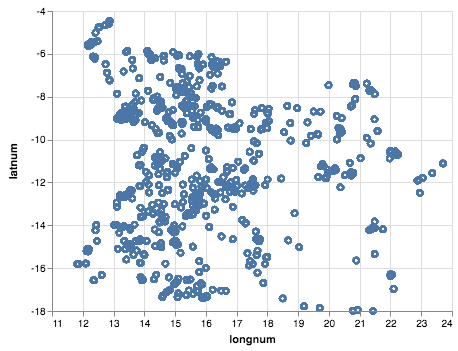

In [3]:
# Going to just extract and manipulate Angola data. Country Code = 'AO'
cc = 'AO'
angola = df[df['dhscc'] == cc]

angola = angola.loc[:, ['longnum', 'latnum', 'dhscc']]

ao_chart = alt.Chart(angola).mark_point().encode(
    alt.X('longnum',
          scale=alt.Scale(zero=False)
    ),
    alt.Y('latnum',
          scale=alt.Scale(zero=False)
    )
)
ao_chart

In [4]:
base = alt.Chart(data).mark_point().encode(
    alt.X('longnum',
          scale=alt.Scale(zero=False)
    ),
    alt.Y('latnum',
          scale=alt.Scale(zero=False)
    ),
    color='dhscc:N'
).properties(
    width=160,
    height=160
).facet(
    column='dhscc:N'
)

# An attempted at a faceted chart for all the data points => chashes the notebook
#chart = alt.hconcat()
#for cc in country_codes:
#    chart |= base.transform_filter(datum.dhscc == cc)

    


['AO' 'BF' 'BJ']


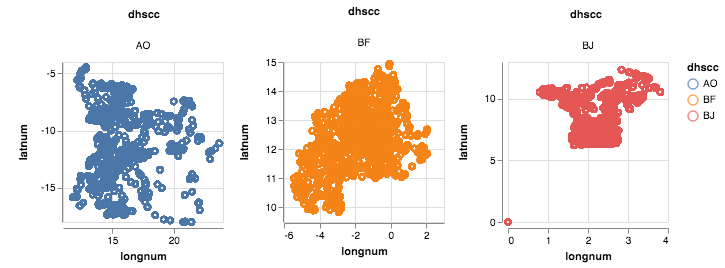

In [5]:
# Attempt at faceting a few of the country codes
test_cc = country_codes[:3]
print(test_cc)

test_chart = alt.vconcat()
for cc in test_cc:
    test_chart |= base.transform_filter(datum.dhscc == cc)
    
test_chart

In [6]:
test_cc = country_codes[3:6]
print(test_cc)

test_chart = alt.hconcat()
for cc in test_cc:
    test_chart |= base.transform_filter(datum.dhscc == cc)
    
test_chart

['BU' 'CD' 'CF']
